In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [3]:
data = sns.load_dataset("titanic")

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning


In [9]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Distribution plot

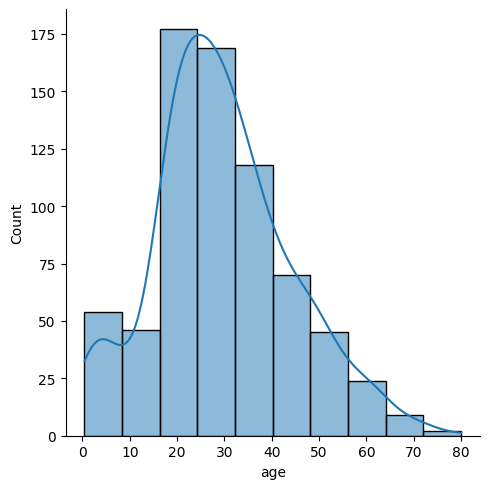

In [15]:
sns.displot(x=data['age'] ,  bins=10 , kde=True)

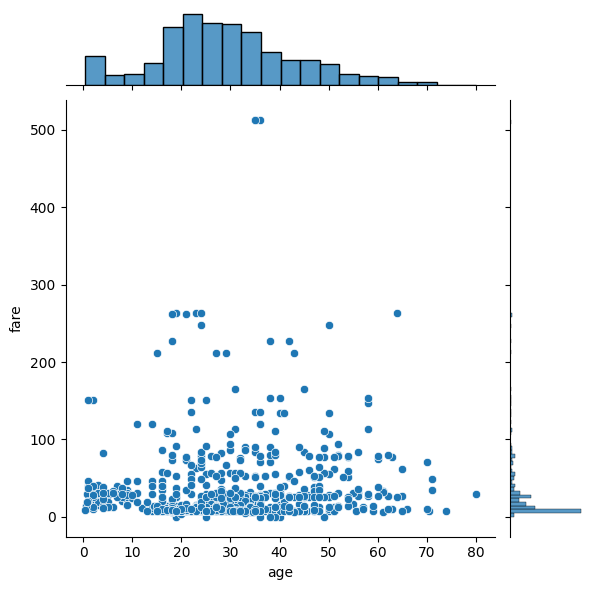

In [6]:
sns.jointplot(x=data['age'] , y=data['fare'])

<Axes: xlabel='fare'>

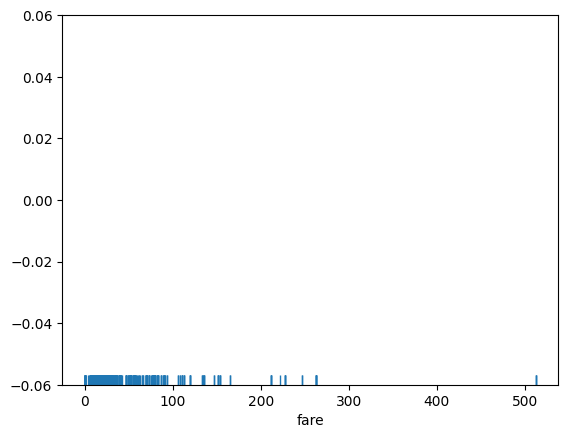

In [12]:
sns.rugplot(data['fare'])

# Categorical Plots

<Axes: >

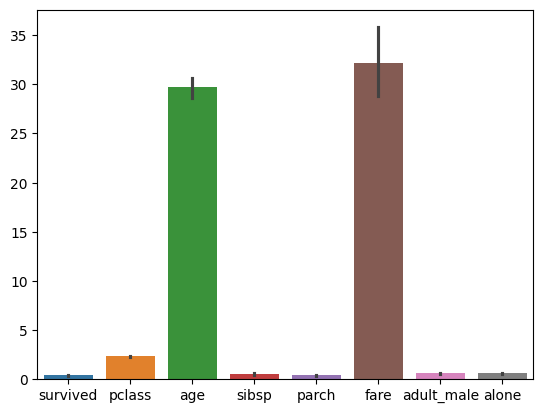

In [16]:
sns.barplot(data=data)

<Axes: xlabel='sex', ylabel='age'>

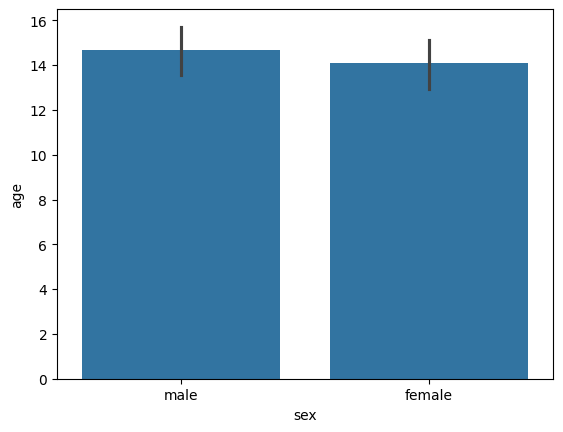

In [22]:
sns.barplot(x=data['sex'] , y= data['age'] , estimator=np.std)

<Axes: xlabel='sex', ylabel='count'>

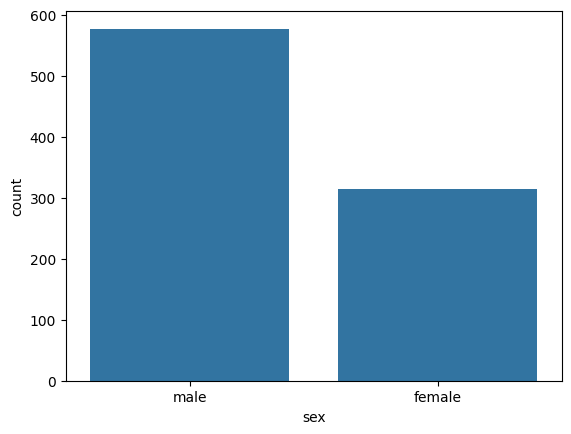

In [23]:
sns.countplot(x=data['sex'])

<Axes: ylabel='age'>

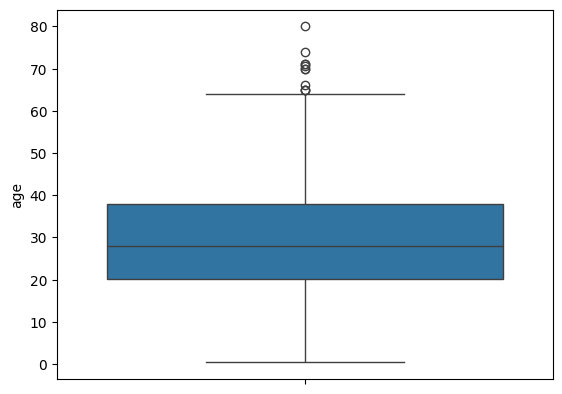

In [25]:
sns.boxplot(data=data['age'])

<Axes: xlabel='sex', ylabel='age'>

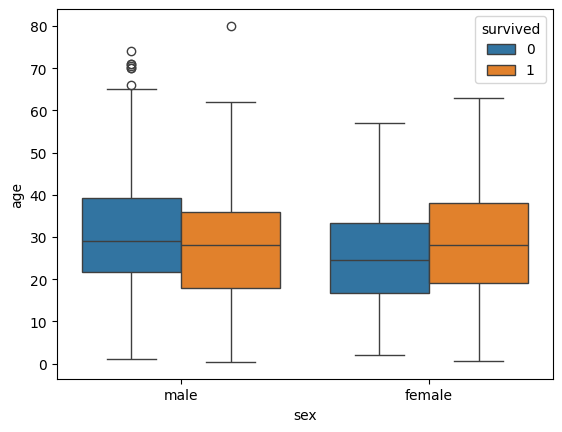

In [29]:
sns.boxplot(x=data['sex'],y=data['age'] , hue=data['survived'])

<Axes: ylabel='age'>

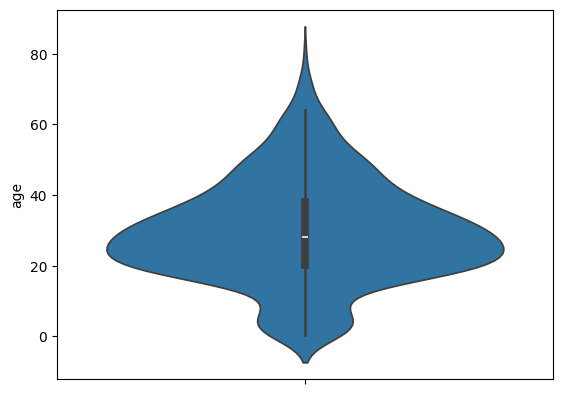

In [30]:
sns.violinplot(data=data['age'])

<Axes: xlabel='sex', ylabel='age'>

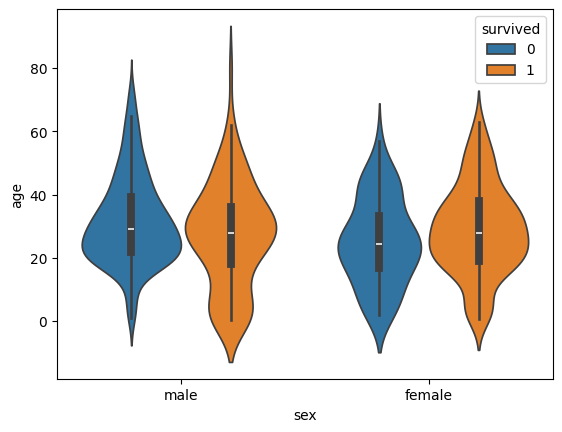

In [36]:
sns.violinplot(x=data['sex'] , y=data['age'],hue=data['survived'])

<Axes: xlabel='sex', ylabel='age'>

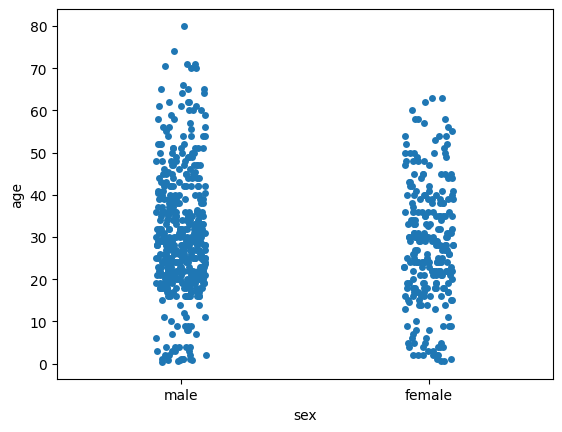

In [37]:
sns.stripplot(x=data['sex'] , y=data['age'])

<Axes: xlabel='sex', ylabel='age'>

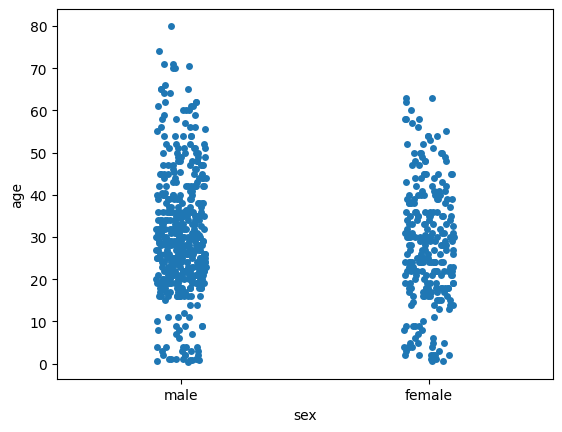

In [38]:
sns.stripplot(x=data['sex'] , y=data['age'] , jitter=True)

<Axes: xlabel='sex', ylabel='age'>

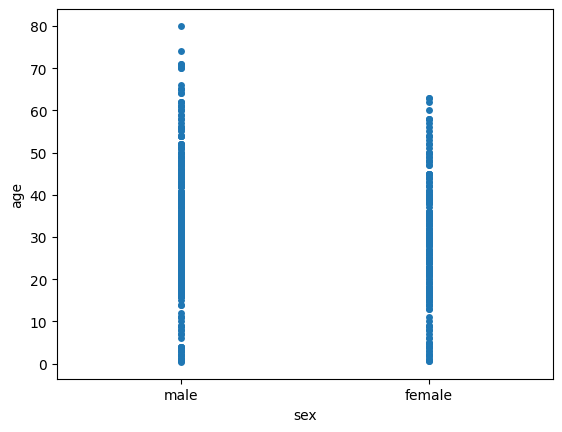

In [39]:
sns.stripplot(x=data['sex'] , y=data['age'] , jitter=False)

<Axes: xlabel='sex', ylabel='age'>

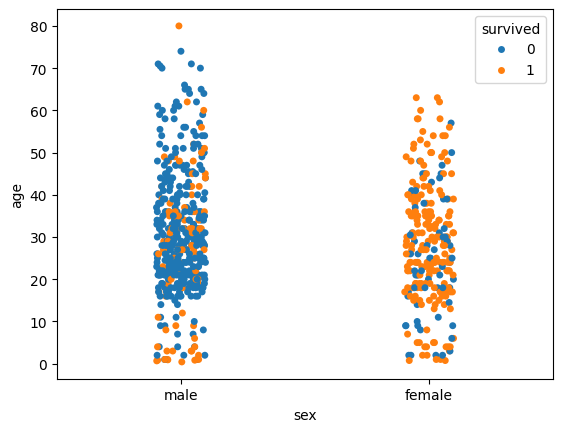

In [40]:
sns.stripplot(x=data['sex'] , y=data['age'] , jitter=True , hue=data['survived'])

In [49]:
cat_feat = data.select_dtypes(include=['object','category']).columns
num_feat = data.drop(columns=cat_feat).columns

In [50]:
print(cat_feat)
print(num_feat)

Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')
Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone'],
      dtype='object')


In [53]:
plt.figure(figsize=(12,14) , (3,3))


for i in range(len(cat_feat)):


IndentationError: expected an indented block (1418422505.py, line 3)

# Matrix plots

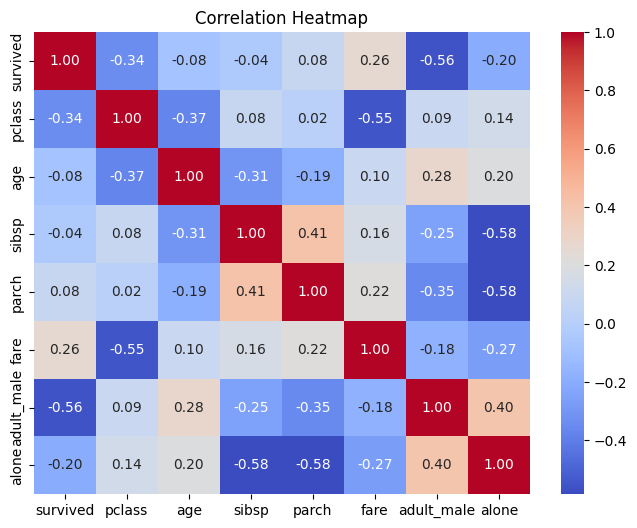

In [52]:
correlation_matrix = data[num_feat].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

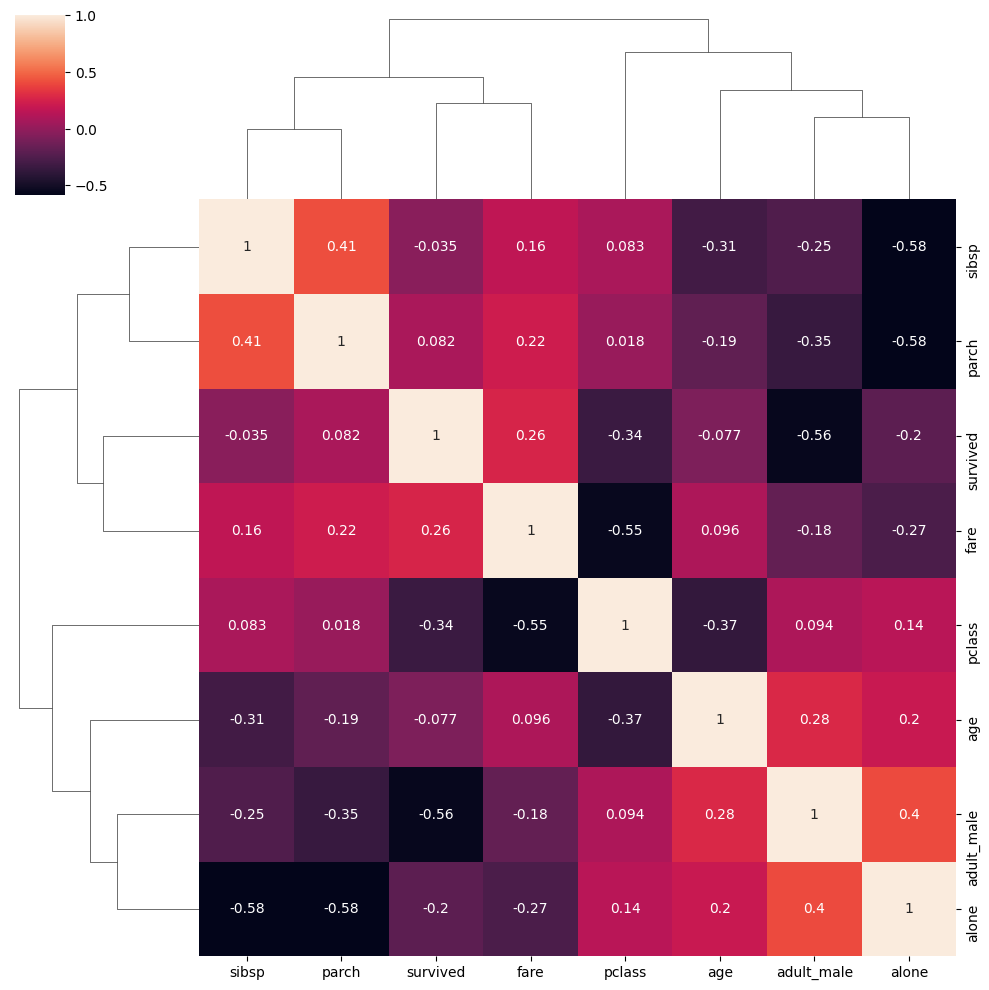

In [60]:
sns.clustermap(data=data[num_feat].corr(), annot=True )